In [77]:
from skimage.color import label2rgb
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from skimage.segmentation import clear_border
import os
from pathlib import Path
from skimage.io import imread

In [76]:
image = Image.open(r"C:\Users\Alina\Desktop\diploma\4\00001.png")


coins = image

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 20.0] = background
markers[coins > 90.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

expanded = expand_labels(seg1, distance=10)

# Show the segmentations.
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(coins, cmap="Greys_r")
axes[0].set_title("Original")

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[1].imshow(color1)
axes[1].set_title("Sobel+Watershed")

color2 = label2rgb(expanded, image=coins, bg_label=0)
axes[2].imshow(color2)
axes[2].set_title("Expanded labels")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()

AttributeError: 'PngImageFile' object has no attribute 'ndim'

In [74]:
folder_path = r"C:\Users\Alina\Desktop\diploma\4\00001.png"
file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.endswith(".png"):
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)

        coins = np.array(image)

        edges = sobel(coins)
        edges = clear_border(edges)

        markers = np.zeros_like(coins)
        foreground, background = 1, 2
        markers[coins < 50.0] = background
        markers[coins > 120.0] = foreground

        ws = watershed(edges, markers)
        seg1 = label(ws == foreground)

        expanded = expand_labels(seg1, distance=10)

        color1 = label2rgb(seg1, image=coins, bg_label=0)
        color2 = label2rgb(expanded, image=coins, bg_label=0)




NotADirectoryError: [WinError 267] Неверно задано имя папки: 'C:\\Users\\Alina\\Desktop\\diploma\\4\\00001.png'

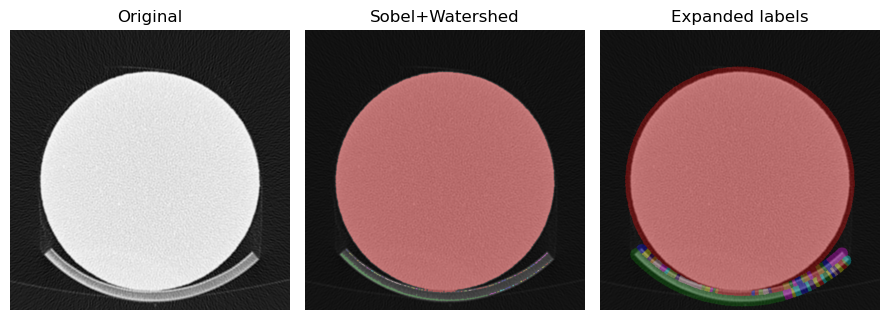

In [59]:
# Show the segmentations.
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(coins, cmap="Greys_r")
axes[0].set_title("Original")

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[1].imshow(color1)
axes[1].set_title("Sobel+Watershed")

color2 = label2rgb(expanded, image=coins, bg_label=0)
axes[2].imshow(color2)
axes[2].set_title("Expanded labels")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()



In [79]:
# путь
desktop_path = Path.home() / "Desktop"

# папки на рабочем столе
original_path = desktop_path / "Original_image"
sobel_path = desktop_path / "Sobel_Watershed_image"
expanded_path = desktop_path / "Expanded_labels_image"

os.makedirs(original_path, exist_ok=True)
os.makedirs(sobel_path, exist_ok=True)
os.makedirs(expanded_path, exist_ok=True)

file_counter = 1


folder_path = r"C:\Users\Alina\Desktop\diploma\4\00001.png"
file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.endswith(".png"):
        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)

        coins = np.array(image)
        


        image_path = os.path.join(folder_path, file_name)
        image = imread(image_path)

        coins = np.array(image)

        edges = sobel(coins)
        edges = clear_border(edges)

        markers = np.zeros_like(coins)
        foreground, background = 1, 2
        markers[coins < 50.0] = background
        markers[coins > 120.0] = foreground

        ws = watershed(edges, markers)
        seg1 = label(ws == foreground)

        expanded = expand_labels(seg1, distance=10)

        color1 = label2rgb(seg1, image=coins, bg_label=0)
        color2 = label2rgb(expanded, image=coins, bg_label=0)




        
        

        plt.imsave(os.path.join(original_path, "original_" + str(file_counter) + ".png"), coins, cmap="Greys_r")
        plt.imsave(os.path.join(sobel_path, "sobel_watershed_" + str(file_counter) + ".png"), color1)
        plt.imsave(os.path.join(expanded_path, "expanded_labels_" + str(file_counter) + ".png"), color2)
        

        file_counter += 1


NotADirectoryError: [WinError 267] Неверно задано имя папки: 'C:\\Users\\Alina\\Desktop\\diploma\\4\\00001.png'

In [39]:
ws

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)

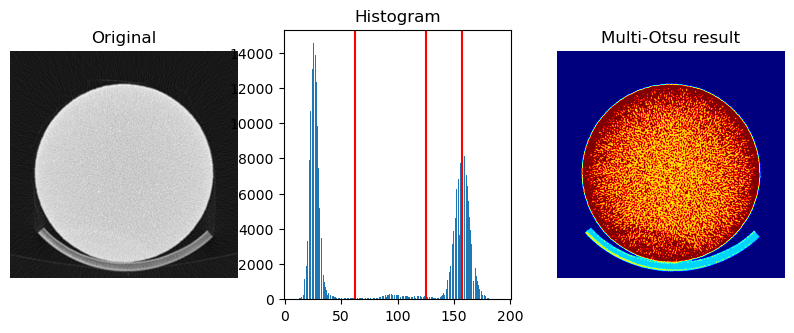

In [24]:
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
# matplotlib.rcParams['font.size'] = 9

# The input image.
# image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(coins, 4)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(coins.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [38]:
regions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)